In [20]:
import pandas as pd 
import os
current_directory = os.getcwd()
os.chdir("/Users/spinokiem/Documents/Spino_DS_prj/ds_prj_FTL/src/data/")
import spyno_excel_tools as spx
os.chdir(current_directory)
import matplotlib.pyplot as plt

In [ ]:
from colorama import Fore, Back, Style

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
jobs = pd.read_csv("../data/processed/data-jobs/20231129-data-jobs.csv")
jobs.head()

,job_link,job_title,comp_name,location,expire_date,update_date,staff_type,salary,job_level,sal_min,...,industry_In ấn / Xuất bản,industry_Giáo dục / Đào tạo,industry_Y tế / Chăm sóc sức khỏe,industry_Biên phiên dịch,industry_Nông nghiệp,industry_Thu mua / Vật tư,industry_Dược phẩm,industry_Bưu chính viễn thông,industry_Thực phẩm & Đồ uống,job_id
0,https://careerbuilder.vn/vi/tim-viec-lam/kien-...,kiến trúc dữ liệu,Ngân Hàng TMCP Sài Gòn - Hà Nội ( SHB ),Hà Nội,2023-12-24,2023-11-25,Nhân viên chính thức,Cạnh tranh,Nhân viên,NaN,...,0,0,0,0,0,0,0,0,0,35BDDD86
1,https://careerbuilder.vn/vi/tim-viec-lam/kien-...,kiến trúc dữ liệu,Ngân Hàng TMCP Sài Gòn - Hà Nội ( SHB ),Hà Nội,2023-12-26,2023-11-27,Nhân viên chính thức,Cạnh tranh,Nhân viên,NaN,...,0,0,0,0,0,0,0,0,0,35BF0F7B
2,https://careerbuilder.vn/vi/tim-viec-lam/data-...,data engineer - khối dữ liệu,Ngân Hàng TMCP Quân Đội,Hà Nội,2023-12-31,2023-11-24,Nhân viên chính thức,Cạnh tranh,Nhân viên,NaN,...,0,0,0,0,0,0,0,0,0,35BEFF75
3,https://careerbuilder.vn/vi/tim-viec-lam/busin...,business analyst - khối dữ liệu,Ngân Hàng TMCP Quân Đội,Hà Nội,2023-12-06,2023-11-07,Nhân viên chính thức,Cạnh tranh,Nhân viên,NaN,...,0,0,0,0,0,0,0,0,0,35BDBD74
4,https://careerbuilder.vn/vi/tim-viec-lam/busin...,business analyst - khối dữ liệu,Ngân Hàng TMCP Quân Đội,Hà Nội,2023-12-10,2023-11-11,Nhân viên chính thức,Cạnh tranh,Nhân viên,NaN,...,0,0,0,0,0,0,0,0,0,35BDFF14


In [7]:
spx.remove_diacritics_col_names(jobs)
jobs.columns

Index(['job_link', 'job_title', 'comp_name', 'location', 'expire_date',
       'update_date', 'staff_type', 'salary', 'job_level', 'sal_min',
       'sal_max', 'currency', 'exp_min', 'exp_max', 'exp_measurement',
       'location_ha_noi', 'location_ho_chi_minh', 'location_tay_ninh',
       'location_bac_ninh', 'location_hung_yen', 'location_binh_duong',
       'location_hau_giang', 'location_da_nang', 'location_ba_ria___vung_tau',
       'location_hai_phong', 'location_quoc_te', 'location_hai_duong',
       'location_binh_phuoc', 'industry_cntt___phan_mem',
       'industry_cntt___phan_cung___mang', 'industry_ngan_hang',
       'industry_quan_ly_chat_luong__qa_qc_', 'industry_ke_toan___kiem_toan',
       'industry_det_may___da_giay___thoi_trang', 'industry_nganh_khac',
       'industry_thong_ke', 'industry_ban_hang___kinh_doanh',
       'industry_quan_ly_dieu_hanh', 'industry_tai_chinh___dau_tu',
       'industry_nhan_su', 'industry_noi_ngoai_that',
       'industry_hanh_chinh___thu_ky

In [18]:
hcm=jobs.query("location_ho_chi_minh==1").copy().reset_index(drop=True)
print("Number of job currently opening at HCM City", hcm.shape[0])

Number of job currently opening at HCM City 44


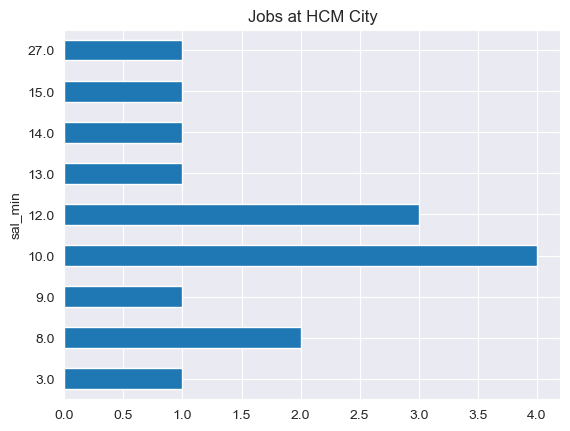

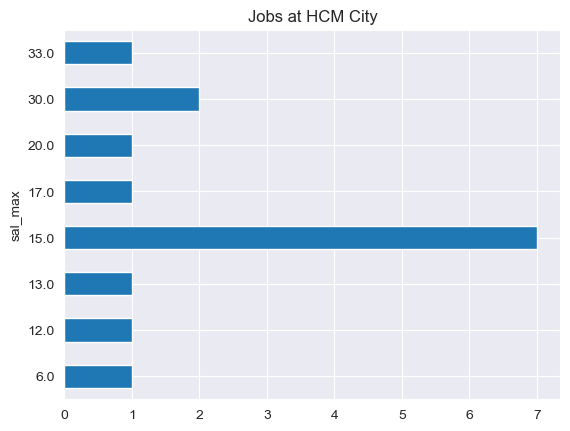

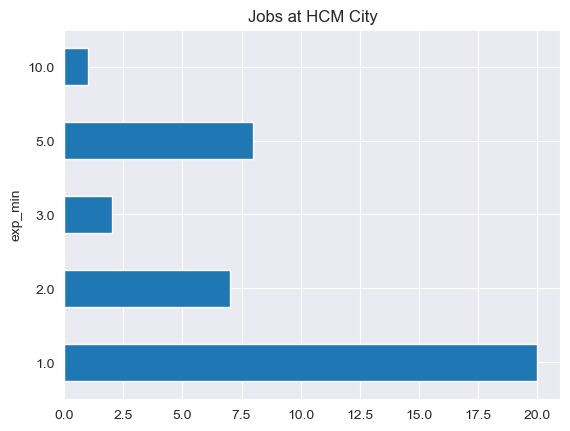

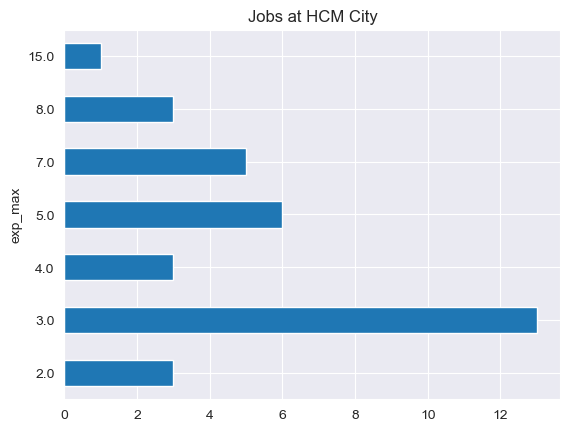

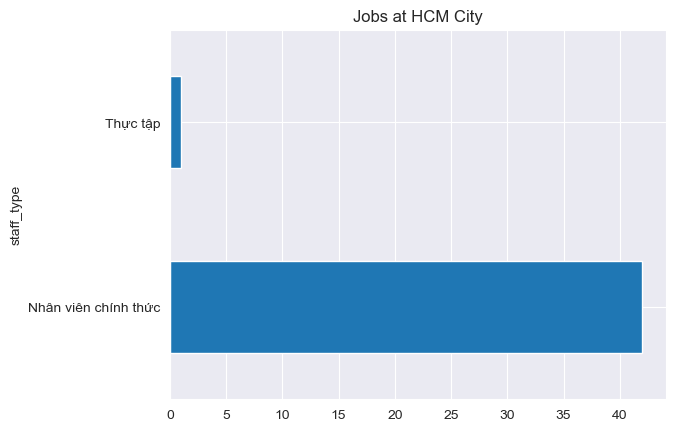

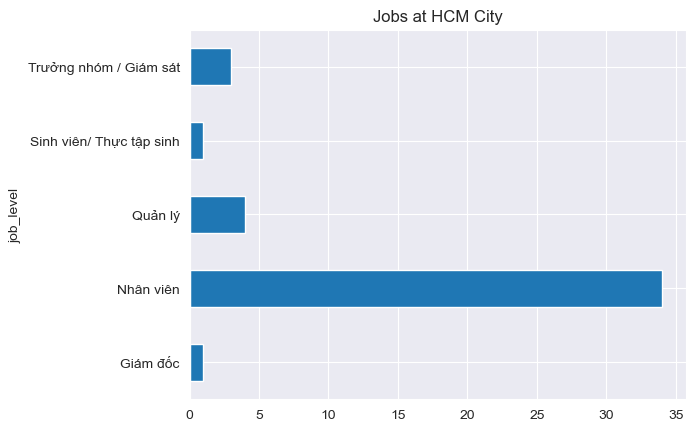

In [26]:
lkp_cols = ['sal_min', 'sal_max', 'exp_min', 'exp_max', 'staff_type', 'job_level']
for i in lkp_cols:
    hcm[i].value_counts().sort_index().plot(kind='barh')
    plt.title("Jobs at HCM City")
    plt.show()

In [38]:
hcm_relevant = hcm.query("job_level=='Nhân viên'")

print(Fore.RED, Style.BRIGHT, "number of companies hiring".upper(), hcm_relevant.comp_name.nunique(), "\n")
for index, comp in enumerate(hcm_relevant.comp_name.unique()):
    print(Style.RESET_ALL, index, comp)

  NUMBER OF COMPANIES HIRING 24 

 0 Công Ty CP Vàng Bạc Đá Quý Phú Nhuận - PNJ
 1 Ngân Hàng TMCP Phương Đông - OCB
 2 Ngân Hàng TMCP Quốc Tế Việt Nam
 3 LPBank
 4 Ngân hàng TMCP Phát triển TP.HCM (HDBank)
 5 CÔNG TY CỔ PHẦN MAYCHA
 6 Ngân hàng Việt Nam Thương Tín
 7 CÔNG TY TNHH THẢO HÀ
 8 CÔNG TY CỔ PHẦN HÙNG CƯỜNG PHARMA
 9 CÔNG TY CỔ PHẦN ONE MOUNT GROUP
 10 Công Ty Cổ phần Tài Việt (Vietstock.vn)
 11 ACB - Ngân Hàng TMCP Á Châu
 12 CÔNG TY CỔ PHẦN NHÀ PHƯƠNG NAM VIỆT NAM
 13 Công Ty Cổ Phần Vacxin Việt Nam
 14 Công ty TNHH Giáo dục Khai Nguyên
 15 VMED GROUP
 16 CÔNG TY CỔ PHẦN JEMMIA
 17 CÔNG TY TNHH THƯƠNG MẠI DỊCH VỤ ẨM THỰC ICOOL
 18 CÔNG TY CỔ PHẦN KING FOOD MARKET
 19 Công Ty Cổ Phần VNG
 20 Công Ty CP Du lịch và Tiếp Thị GTVT Việt Nam- Vietravel
 21 Công ty TNHH TM Quốc Tế Hải Sản Hoàng Gia
 22 Công ty Cổ Phần Thế Giới Di Động
 23 Công ty cổ phần Nafoods Group


In [40]:
print(Fore.RED, Style.BRIGHT, "number of unique job_title".upper(), hcm_relevant.job_title.nunique(), "\n")
for index, comp in enumerate(hcm_relevant.job_title.unique()):
    print(Style.RESET_ALL, index, comp)

  NUMBER OF UNIQUE JOB_TITLE 30 

 0 chuyên viên - quản trị mô hình dữ liệu (data modeling)
 1 ho - cv/cvcc phân tích dữ liệu báo cáo, khối bán lẻ (mis)
 2 chuyên gia khoa học dữ liệu ngân hàng số - digital data science
 3 khối cntt - chuyên viên ban tích hợp dữ liệu và báo cáo
 4 dtc - chuyên viên quy trình và chính sách quản trị dữ liệu
 5 r&d data analyst – chuyên viên dữ liệu r&d
 6 cv/nv quản trị cơ sở dữ liệu (dba) - khối cntt
 7 nhân viên quản trị hệ thống dữ liệu
 8 nhân viên admin phân tích dữ liệu
 9 chuyên viên thu thập dữ liệu bđs (thổ cư/dự án)
 10 phân tích kỹ thuật (chứng khoán)_technical analysis
 11 ho - giám đốc xây dựng mô hình & định lượng
 12 ho - data quality/ data governance specialist
 13 ho - cvcc quản lý mô hình đo lường rủi ro, khối quản lý rủi ro
 14 nhân viên digital marketing
 15 nhân viên data analyst
 16 chuyên viên phân tích tài chính
 17 [hcm] nhân viên triển khai (phần mềm lĩnh vực y tế)
 18 chuyên viên trải nghiệm khách hàng
 19 data science
 20 seni

In [46]:
hcm_relevant[[
    'job_link', 'job_title', 'comp_name', 'location',
    'staff_type', 'salary', 'job_level', 'sal_min',
    'sal_max', 'currency', 'exp_min', 'exp_max', 'exp_measurement']].to_clipboard()